# Figure 4e - scATAC

Name for the Count Matrix used:
- GSE137069_Merged_filtered_peak_bc_matrix.h5

Link for the Count Matrix Data:
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE137069

In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject

Attaching sp



# 1. Loading Data

In [2]:
# load data
DATA.data <- Read10X_h5("~/project/data/filtered_peak_bc_matrix.h5")

In [3]:
#initialize the Seurat object with the raw (non-normalized data)
DATA<- CreateSeuratObject(counts = DATA.data, project = "KRAS")

In [4]:
DATA

An object of class Seurat 
152991 features across 11712 samples within 1 assay 
Active assay: RNA (152991 features, 0 variable features)

In [5]:
DATA[[]]

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
AAACGAAAGAATCAAC-2,KRAS,48758,18737
AAACGAAAGAGGTGGG-1,KRAS,2690,1291
AAACGAAAGCTGATTC-1,KRAS,19040,8427
AAACGAAAGGAGAACA-1,KRAS,28447,11743
AAACGAAAGTCCCGCA-1,KRAS,23903,9859
AAACGAAAGTTGTCCA-2,KRAS,2167,929
AAACGAACAACTTGGT-2,KRAS,53304,20623
AAACGAACAAGCCTTA-1,KRAS,30822,12686
AAACGAACATTACTCT-1,KRAS,1810,753


# 2.Filtering

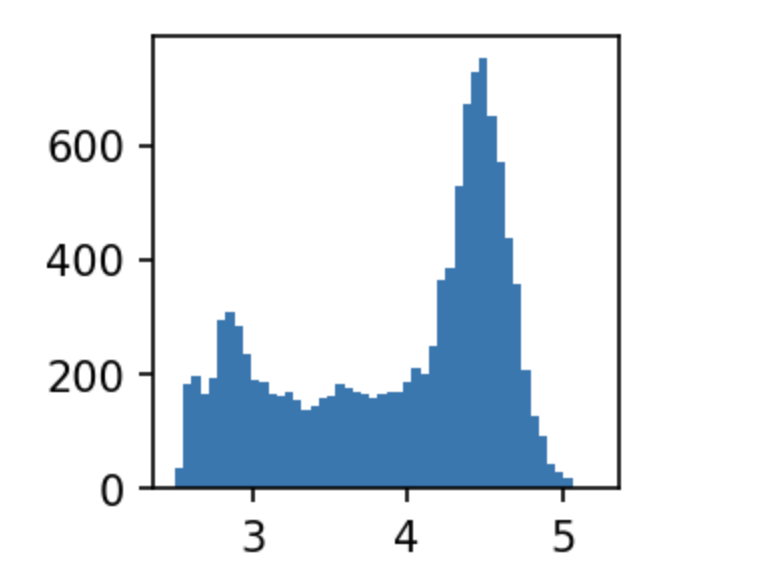

The paper used 12589 read count as a threshold based on this histogram

In [6]:
DATA <- subset(DATA, subset = nCount_RNA > 12589)

In [7]:
gene_ids <- rownames(x=DATA)
row_len <- nrow(x=DATA)

In [8]:
i <- 0
for (x in 1:row_len){
    
    temp <- strsplit(strsplit(gene_ids[x], ":", fixed = TRUE)[[1]], "-", fixed=TRUE)
    if ((strtoi(temp[[2]][2]) - strtoi(temp[[2]][1]))<2 | (strtoi(temp[[2]][2]) - strtoi(temp[[2]][1]))>2000){
        
        if (i == 0){
            index<-c(x)
            i <- 2
        }
        index<-append(index,x)
    }
}

In [11]:
gene_ids <- gene_ids[-c(index)]

In [12]:
DATA <- subset(DATA, features = gene_ids)

In [13]:
DATA

An object of class Seurat 
116803 features across 6369 samples within 1 assay 
Active assay: RNA (116803 features, 0 variable features)

# 3.Labeling Cell

In [12]:
cell <- colnames(DATA)
col_len <- ncol(DATA)

In [13]:
temp <- strsplit(cell[1], "-", fixed = TRUE)
print(temp[[1]][2]== 2)

[1] TRUE


In [14]:
for (x in 1:col_len){
    temp <- strsplit(cell[x], "-", fixed = TRUE)
    if (temp[[1]][2]==1){
        cell[x]<- "Kras*+Injury"
    }
    else {
        cell[x]<- "Kras*"
    }
}

In [15]:
cell[3]

[1] "Kras*+Injury"

In [16]:
DATA[["cell_type"]]<- cell

In [17]:
DATA[[]]

,orig.ident,nCount_RNA,nFeature_RNA,cell_type
,<fct>,<dbl>,<int>,<chr>
AAACGAAAGAATCAAC-2,KRAS,21741,10018,Kras*
AAACGAAAGCTGATTC-1,KRAS,7930,3953,Kras*+Injury
AAACGAAAGGAGAACA-1,KRAS,12292,5934,Kras*+Injury
AAACGAAAGTCCCGCA-1,KRAS,9110,4425,Kras*+Injury
AAACGAACAACTTGGT-2,KRAS,26460,12038,Kras*
AAACGAACAAGCCTTA-1,KRAS,12895,6191,Kras*+Injury
AAACGAACATTGTGAC-2,KRAS,24161,11283,Kras*
AAACGAACATTTGGCA-2,KRAS,18752,8940,Kras*
AAACGAAGTAAAGGCC-2,KRAS,8199,4085,Kras*


# 4. Finding Variable Genes and Normalizing

In [18]:
#finding variable genes
DATA_filt <- FindVariableFeatures(DATA, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(DATA_filt), 10)

In [19]:
DATA_filt

An object of class Seurat 
133680 features across 6369 samples within 1 assay 
Active assay: RNA (133680 features, 2000 variable features)

In [ ]:
#perform scaling before PCA

DATA_filt <- ScaleData(object = DATA_filt, vars.to.regress = c("nCount_RNA"))

Regressing out nCount_RNA



# 5. Performing PCA and Clustering

In [21]:
#performing PCA 
DATA_filt <- RunPCA(DATA_filt, npcs = 100)

PC_ 1 
Positive:  chr11:109011422-109012324, chr3:5860139-5861047, chr9:123461601-123462399, chr5:146260775-146261569, chr5:107409005-107410825, chr15:74268154-74269233, chr8:118502151-118503381, chr2:156295177-156297058, chr16:11143710-11144510, chr1:3514498-3515608 
	   chr2:122260415-122262219, chr3:148599369-148600716, chr2:30620224-30621258, chr9:47234794-47236390, chr2:19444615-19446480, chr13:70454644-70455572, chr5:137263628-137264705, chr16:4497620-4498747, chr6:29031857-29033205, chr13:62989897-62990779 
	   chr17:36231038-36232015, chr19:39060739-39061842, chr12:24928118-24929107, chr3:153488946-153490049, chr12:104896601-104897890, chr16:37389371-37390493, chr4:51474993-51475993, chr7:24467057-24468790, chr4:43425258-43426301, chr7:131121815-131123480 
Negative:  chr9:92537662-92539135, chr6:91964951-91965759, chr11:109816846-109817927, chr2:117017774-117018957, chr18:23868549-23869807, chr11:50622093-50622808, chr14:54443171-54444229, chr5:111805021-111806315, chr7:1147778

In [22]:
#performing clustering
DATA_filt <- FindNeighbors(DATA_filt, dims = 1:20)
DATA_filt <- FindClusters(DATA_filt, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6369
Number of edges: 336533

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8163
Number of communities: 7
Elapsed time: 1 seconds


In [23]:
DATA_filt[[]]

,orig.ident,nCount_RNA,nFeature_RNA,cell_type,RNA_snn_res.0.5,seurat_clusters
,<fct>,<dbl>,<int>,<chr>,<fct>,<fct>
AAACGAAAGAATCAAC-2,KRAS,21741,10018,Kras*,1,1
AAACGAAAGCTGATTC-1,KRAS,7930,3953,Kras*+Injury,1,1
AAACGAAAGGAGAACA-1,KRAS,12292,5934,Kras*+Injury,0,0
AAACGAAAGTCCCGCA-1,KRAS,9110,4425,Kras*+Injury,1,1
AAACGAACAACTTGGT-2,KRAS,26460,12038,Kras*,1,1
AAACGAACAAGCCTTA-1,KRAS,12895,6191,Kras*+Injury,1,1
AAACGAACATTGTGAC-2,KRAS,24161,11283,Kras*,2,2
AAACGAACATTTGGCA-2,KRAS,18752,8940,Kras*,2,2
AAACGAAGTAAAGGCC-2,KRAS,8199,4085,Kras*,0,0


# 6. UMAP Visualization

In [24]:
#UMAP
#DATA_filt <- RunUMAP(DATA_filt,dims.use = 1:20, min.dist = 0.3, reduction.use = "pca", genes.use = NULL,reduction.name = "umap", reduction.keep = "UMAP")

DATA_filt <- RunUMAP(DATA_filt, min.dist = 0.3, dims = 1:20)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
22:13:00 UMAP embedding parameters a = 0.9922 b = 1.112

22:13:00 Read 6369 rows and found 20 numeric columns

22:13:00 Using Annoy for neighbor search, n_neighbors = 30

22:13:00 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:13:01 Writing NN index file to temp file /var/folders/ld/mwm08msj5pz3dt14ggrkr7cc0000gn/T//RtmpoBKbMm/filec8cd5c240311

22:13:01 Searching Annoy index using 1 thread, search_k = 3000

22:13:03 Annoy recall = 100%

22:13:03 Commencing smooth kNN distance calibrat

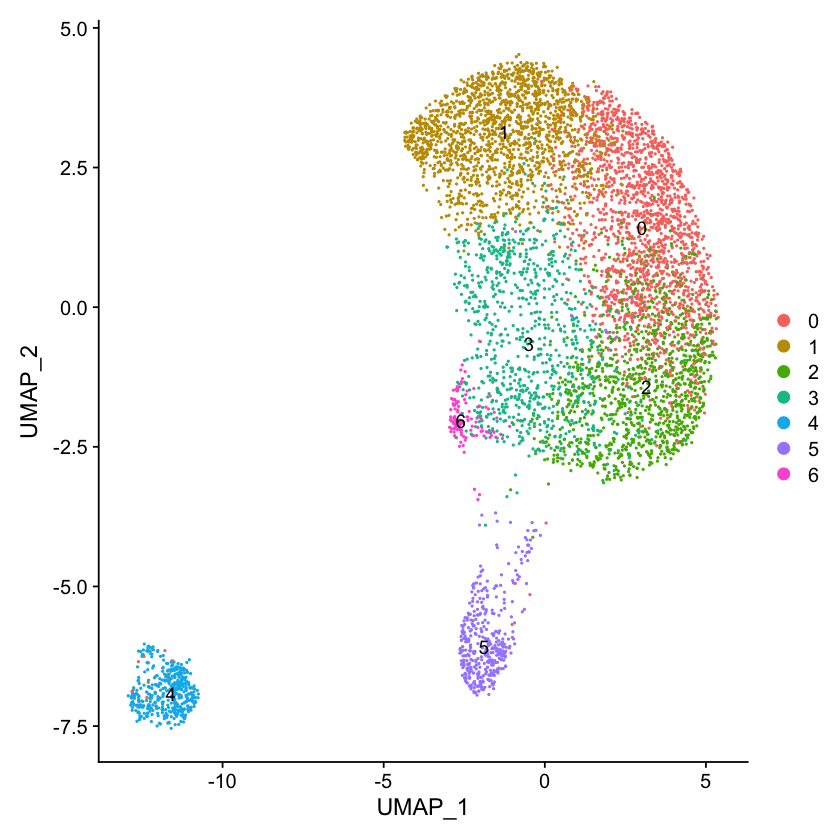

In [25]:
DimPlot(DATA_filt,label = TRUE, reduction = "umap")

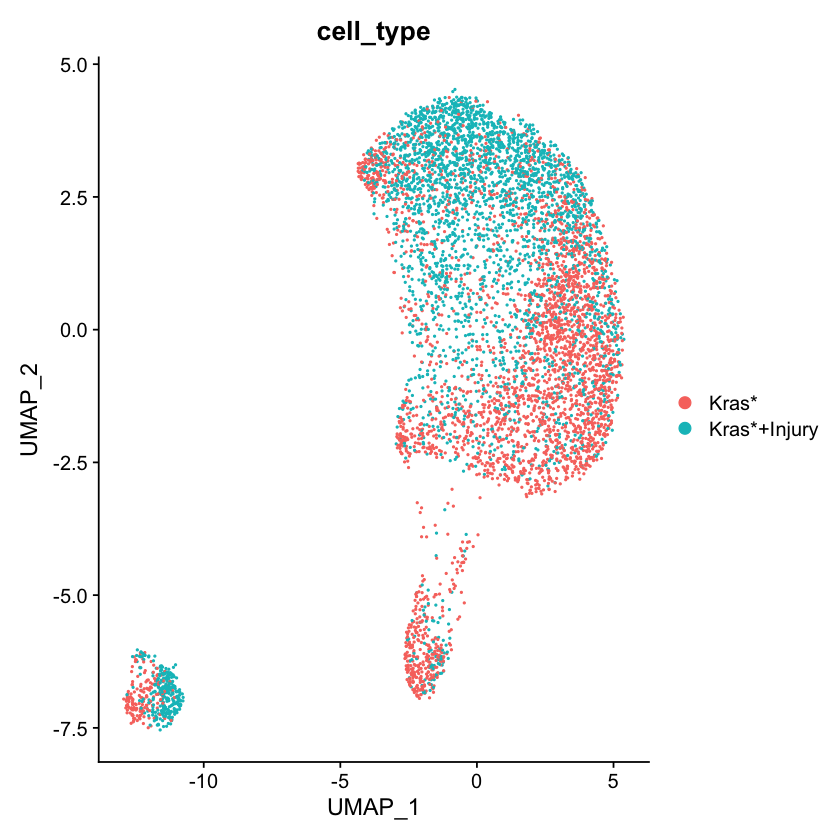

In [26]:
DimPlot(DATA_filt, reduction = "umap", group.by = "cell_type")